In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import misc
import math
from numpy import r_
from skimage import io
from math import cos

In [94]:
f = io.imread('binary_im_1.png', as_gray=True)

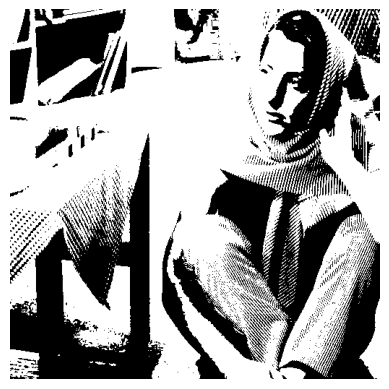

In [95]:
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [96]:
n = 8  # This will be the window in which we perform our DCT
sumd = 0 # INI value

# Create some blank matrices to store our data

dctmatrix = np.zeros(np.shape(f)) # Create a DCT matrix in which to plug our values :)
f = f.astype(np.int16) # Convert so we can subtract 128 from each pixel
f = f-128 # As said above
f2 = np.zeros(np.shape(f)) # This will be where the compressed image goes

# Let's preview our f values
f

array([[ 127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127, -128,
        -128, -128, -128, -128, -128,  127,  127,  127,  127,  127,  127,
         127, -128, -128, -128, -128, -128, -128, -128,  127,  127,  127,
        -128, -128, -128, -128,  127,  127,  127,  127,  127,  127,  127,
         127,  127, -128, -128, -128, -128, -128, -128, -128, -128, -128,
        -128, -128, -128, -128, -128, -128, -128, -128, -128, -128, -128,
        -128, -128, -128, -128, -128,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127, -128, -128, -128, -128, -128,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  127,  127, 

In [97]:
def cosp(i,j,n): # This is the funky cos function inside the DCT
    output = 0
    output = cos(((2*i)+1)*j*math.pi/(2*n))
    return output

In [98]:
def convolveDCT(f,n,u,v,a,b): # This convolve function compute DCT for nxn @ axb location
    sumd = 0                               #INI value
    for x in r_[0:n]:
        for y in r_[0:n]:
            u = u%n
            v = v%n
            sumd += f[x+a,y+b]*cosp(x,u,n)*cosp(y,v,n)
    # Now, need to perform the functions outside of the sum values    
    if u == 0: sumd *= 1/math.sqrt(n) 
    else: sumd *= math.sqrt(2)/math.sqrt(n)
    if v == 0: sumd *= 1/math.sqrt(n)
    else: sumd *= math.sqrt(2)/math.sqrt(n)
    

    return sumd

In [99]:
for a in r_[0:np.shape(f)[0]:n]:
    for b in r_[0:np.shape(f)[1]:n]:
        # Below, compute the DCT for a given uxv location in the DCT Matrix
        for u in r_[a:a+n]:
            for v in r_[b:b+n]:
                dctmatrix[u,v] = convolveDCT(f,n,u,v,a,b)
                
np.around(dctmatrix)

array([[ 1.016e+03,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00, -0.000e+00, -0.000e+00,  1.016e+03,  0.000e+00,
        -0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00,
        -0.000e+00,  1.550e+02,  8.800e+02, -2.080e+02, -1.990e+02,
         1.590e+02,  2.900e+01, -8.600e+01,  3.700e+01,  9.200e+01,
        -8.980e+02, -1.250e+02,  2.490e+02,  9.600e+01, -1.040e+02,
        -5.200e+01,  5.100e+01, -4.500e+02,  7.040e+02,  4.370e+02,
         1.410e+02, -6.400e+01, -1.360e+02, -1.120e+02, -5.500e+01,
        -2.590e+02,  3.050e+02, -6.520e+02, -3.860e+02,  1.270e+02,
         4.000e+00, -7.500e+01,  9.900e+01,  7.930e+02, -3.030e+02,
        -2.670e+02, -2.160e+02, -1.590e+02, -1.060e+02, -6.200e+01,
        -2.800e+01, -4.180e+02,  7.040e+02,  3.500e+02,  2.600e+01,
        -9.600e+01, -2.100e+01,  9.600e+01,  1.070e+02, -1.024e+03,
        -0.000e+00,  0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
         0.000e+00,  0.000e+00,  3.150e+02, -4.6

Text(0.5, 1.0, '8x8 DCTs of the image')

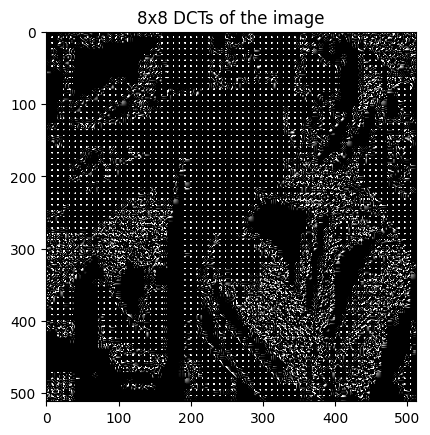

In [100]:
plt.figure()
plt.imshow(dctmatrix,cmap='gray',vmax = np.around(np.max(dctmatrix)*0.1),vmin = 0)
plt.title("8x8 DCTs of the image")

In [84]:
np.set_printoptions(threshold=np.inf)

In [101]:
# Now, let's manipulate stuff a bit. Here, we will use a standard quant table to compress image
Quant = np.array([
  [16, 11, 10, 16, 24, 40, 51, 61],
  [12, 12, 14, 19, 26, 58, 60, 55],
  [14, 13, 16, 24, 40, 57, 69, 56],
  [14, 17, 22, 29, 51, 87, 80, 62],
  [18, 22, 37, 56, 68, 109, 103, 77],
  [24, 35, 55, 64, 81, 104, 113, 92],
  [49, 64, 78, 87, 103, 121, 120, 101],
  [72, 92, 95, 98, 112, 100, 103, 99]
])

# Convolve nxn sections across entire image to return    
# As factor variable increases, the image will compress even more
factor = 2
for a in r_[0:np.shape(f)[0]:n]:
    for b in r_[0:np.shape(f)[1]:n]:
        dctmatrix[a:a+n,b:b+n] = dctmatrix[a:a+n,b:b+n]/Quant*factor

        
# Let's take a look at how much it compressed the DCT...
# Display entire DCT
#plt.figure()
#plt.imshow(dctmatrix,cmap='gray',vmax = np.max(dctmatrix)*0.01,vmin = 0)
#plt.title("8x8 DCTs of the image")

np.around(dctmatrix)

array([[ 127.,    0.,   -0.,    0.,    0.,    0.,   -0.,   -0.,  127.,
           0.,   -0.,    0.,    0.,    0.,   -0.,   -0.,   19.,  160.,
         -42.,  -25.,   13.,    1.,   -3.,    1.,   11., -163.,  -25.,
          31.,    8.,   -5.,   -2.,    2.,  -56.,  128.,   87.,   18.,
          -5.,   -7.,   -4.,   -2.,  -32.,   56., -130.,  -48.,   11.,
           0.,   -3.,    3.,   99.,  -55.,  -53.,  -27.,  -13.,   -5.,
          -2.,   -1.,  -52.,  128.,   70.,    3.,   -8.,   -1.,    4.,
           4., -128.,   -0.,    0.,   -0.,   -0.,   -0.,    0.,    0.,
          39.,  -85.,  -74.,  -13.,   -5.,    0.,   -2.,   -1.,   83.,
          -8.,  -15.,   -5.,    3.,   -1.,    3.,   -0.,   95.,    0.,
          -0.,    0.,    0.,    0.,   -0.,   -0.,   95.,    0.,   -0.,
           0.,    0.,    0.,   -0.,   -0.,   95.,    0.,   -0.,    0.,
           0.,    0.,   -0.,   -0.,  103.,  -11.,   -0.,    7.,   -5.,
           2.,   -0.,   -0.,   87.,   39.,   17.,   -4.,   -5.,   -1.,
      

In [73]:
c = 0
for i in range(64):
    if dctmatrix[0,i] < -1:
        c += 1

c

8